In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./climate_change_data.csv', parse_dates=['Date'])

In [3]:
data

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10000 non-null  datetime64[ns]
 1   Location        10000 non-null  object        
 2   Country         10000 non-null  object        
 3   Temperature     10000 non-null  float64       
 4   CO2 Emissions   10000 non-null  float64       
 5   Sea Level Rise  10000 non-null  float64       
 6   Precipitation   10000 non-null  float64       
 7   Humidity        10000 non-null  float64       
 8   Wind Speed      10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


In [5]:
data.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [6]:
data.shape

(10000, 9)

In [7]:
data.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [8]:
data['Year']=data.Date.dt.year
data['Month']=data.Date.dt.month
data['Day']=data.Date.dt.day
data['Time']=data.Date.dt.time

In [9]:
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12:29:09.774977
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303


In [10]:
data.drop(columns='Date',inplace=True)

In [11]:
data.head()

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
3,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12:29:09.774977
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303


In [12]:
data.tail()

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
9995,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866,2022,12,27,15:21:06.966696
9996,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,2022,12,28,11:30:50.225022
9997,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,2022,12,29,07:40:33.483348
9998,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255,2022,12,30,03:50:16.741674
9999,West Anthonyburgh,Sao Tome and Principe,12.661928,381.172746,2.260788,78.339658,99.243923,41.856539,2022,12,31,00:00:00


In [13]:
data.Country.nunique()

243

#### alphabetical countrywise sorting

In [14]:
data.sort_values(by='Country')

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
1487,New Amandaport,Afghanistan,19.286110,367.129854,1.526788,66.083481,40.803248,45.053978,2003,6,3,04:55:05.130513
9467,Andreborough,Afghanistan,23.779463,407.678145,0.157951,53.865331,47.698467,8.985601,2021,10,10,01:48:26.570657
2360,Lake James,Afghanistan,23.246627,440.108884,-0.842610,34.358578,1.170188,22.763727,2005,6,5,14:21:29.648964
9616,Alanfort,Afghanistan,20.635836,457.409147,-1.513876,46.047993,64.514389,39.345821,2022,2,12,05:56:52.061206
5970,East Dawnhaven,Afghanistan,6.585391,417.211146,0.152810,7.671391,45.624949,41.400428,2013,9,24,07:14:12.205220
...,...,...,...,...,...,...,...,...,...,...,...,...
8230,Jasonport,Zimbabwe,17.016642,435.881379,-0.295005,49.554816,96.341916,30.486986,2018,12,5,21:23:36.021602
3371,Kennethtown,Zimbabwe,14.518359,453.051727,0.007972,99.910443,61.149839,14.976775,2007,10,2,22:09:23.816381
9613,Veronicahaven,Zimbabwe,16.680793,442.480580,-1.096333,87.933353,5.155046,48.221821,2022,2,9,17:27:42.286228
364,New Samantha,Zimbabwe,16.233522,387.659427,-0.756107,48.108768,83.120805,25.681227,2000,11,1,18:58:26.030603


In [15]:
data.Country.value_counts()

Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: Country, Length: 243, dtype: int64

### Details of India

In [16]:
india_details=data.query("Country=='India'")
india_details

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
44,Stewartbury,India,13.863784,408.121863,-0.078811,77.498661,31.356005,26.264121,2000,2,6,23:07:43.366336
153,Port Jesus,India,14.563792,441.458510,0.012392,72.783893,64.897858,44.925654,2000,5,8,12:47:18.523852
420,Lake Heather,India,8.050407,352.500027,-1.081892,85.429837,90.573097,33.954562,2000,12,18,20:02:48.496849
604,Port Haydentown,India,12.435437,380.040060,-0.376124,92.218718,7.455810,41.320736,2001,5,22,09:51:28.028802
626,Marisafort,India,19.580143,412.246774,1.490122,55.683053,63.584592,44.651892,2001,6,9,21:25:19.711971
754,Jacobland,India,18.290347,312.602899,-0.556386,29.791763,29.240185,47.933234,2001,9,25,10:09:36.777677
764,South Kimberlyshire,India,12.013457,334.323596,-0.046268,55.820262,98.889572,32.544557,2001,10,3,19:46:49.360936
1437,New David,India,8.794670,352.886364,-0.773098,98.618001,99.591771,49.080657,2003,4,22,04:49:02.214221
2589,South Robertstad,India,18.649079,417.644878,-0.488305,74.032718,20.658963,43.859921,2005,12,14,23:27:35.805580
2805,Bowersfurt,India,15.702748,462.738893,-1.027062,67.324433,39.692066,27.317580,2006,6,14,10:27:19.603960


In [17]:
india_details.sort_values(by="Temperature")

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
7993,Davidbury,India,6.770180,285.499915,1.255241,32.294763,3.406655,3.137896,2018,5,20,18:59:43.798379
5002,Keithmouth,India,6.834645,445.085225,-0.480513,58.788707,61.433921,9.596664,2011,7,4,02:24:18.145814
5994,Evanport,India,7.514150,330.623113,0.010152,16.569574,1.542091,43.072541,2013,10,14,11:07:30.405040
420,Lake Heather,India,8.050407,352.500027,-1.081892,85.429837,90.573097,33.954562,2000,12,18,20:02:48.496849
1437,New David,India,8.794670,352.886364,-0.773098,98.618001,99.591771,49.080657,2003,4,22,04:49:02.214221
9713,Longview,India,9.903226,458.566159,-1.206748,57.588559,44.788664,7.515474,2022,5,4,17:39:48.118811
6472,Jennifermouth,India,10.466862,357.520635,0.162902,55.520724,51.620906,31.313928,2014,11,20,00:34:07.884788
4309,Oliverside,India,11.243023,397.590335,-0.095128,64.807298,73.685582,4.906028,2009,11,28,22:07:40.126012
764,South Kimberlyshire,India,12.013457,334.323596,-0.046268,55.820262,98.889572,32.544557,2001,10,3,19:46:49.360936
6079,West Williemouth,India,12.255525,455.327197,0.856938,0.094976,63.672917,19.287377,2013,12,24,20:53:47.362736


#### Country with highest temperature

In [18]:
data.nlargest(1,"Temperature")

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
5601,Bradleyport,Niger,33.976956,370.009529,-1.173126,53.160033,47.798918,16.57178,2012,11,18,07:27:09.882988


"Niger has the highest temperature"

#### Country with lowest temperature

In [19]:
data.nsmallest(1,"Temperature")

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
7663,East Edward,Liechtenstein,-3.803589,350.546781,-0.875512,17.935275,79.957867,7.698461,2017,8,16,13:31:48.550855


'Liechtenstein has the lowest temperature'

#### Number of Country with Temperature greater than 30

In [20]:
country_temp_greater_30=data.query("Temperature>=30.0")
country_temp_greater_30

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
480,Lake Leahburgh,Congo,30.554231,338.373171,-0.464692,66.163779,5.846293,46.685396,2001,2,7,05:46:03.996399
544,Moraborough,Liechtenstein,30.609992,420.796144,-0.257760,67.978381,58.082146,14.480108,2001,4,2,00:08:12.529252
877,East Meganshire,Bahrain,30.556774,283.716379,2.404841,76.699991,80.005142,25.268714,2002,1,6,18:05:17.551755
1195,Malonefort,China,30.249102,420.932290,0.943104,45.733431,87.003256,5.736739,2002,9,30,21:36:33.699369
1654,Lake Michelleview,Brunei Darussalam,30.816299,374.079413,0.496650,59.449509,15.047412,46.130424,2003,10,21,11:58:29.270927
1995,Campbellshire,Georgia,30.270203,363.336189,-0.224672,22.005700,83.192014,27.302722,2004,8,2,23:13:20.360036
2224,Perezborough,Uruguay,31.455420,469.597143,0.815082,66.393905,15.000543,45.734782,2005,2,11,08:19:26.516651
2839,Lake Johnbury,Malawi,32.403159,352.800570,0.836593,90.012918,37.163428,40.449947,2006,7,12,23:57:50.387038
3047,North Caitlinbury,Somalia,30.440684,390.717803,-0.827628,73.397842,5.125633,12.443671,2007,1,3,17:39:48.118811
3098,Flemingburgh,Tajikistan,30.661077,362.253882,-1.010229,63.409681,24.427014,27.243317,2007,2,15,13:55:34.293429


In [21]:
list_country_temp_greater_30=list(country_temp_greater_30.index)

In [22]:
print("No.of countries with temperature greater than 30 or the hottest countries: ",len(list_country_temp_greater_30))

No.of countries with temperature greater than 30 or the hottest countries:  20


#### list 10 Countries with highest co2 emission rate

In [23]:
country_high_co2=data.groupby(['Country'])['CO2 Emissions'].max()
country_high_co2

Country
Afghanistan          576.498970
Albania              529.386693
Algeria              491.187335
American Samoa       491.278330
Andorra              489.732647
                        ...    
Wallis and Futuna    543.855598
Western Sahara       506.129390
Yemen                488.716530
Zambia               509.767983
Zimbabwe             532.408919
Name: CO2 Emissions, Length: 243, dtype: float64

In [24]:
data.nlargest(10,'CO2 Emissions')

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
442,Port Matthewfort,Burkina Faso,9.198690,582.899701,-2.408251,24.835655,68.317519,10.496046,2001,1,6,07:36:40.180018
5886,Phillipmouth,Reunion,16.371882,576.650885,1.326797,63.357124,51.850652,9.045268,2013,7,15,17:37:38.505850
3662,Michaelshire,Afghanistan,14.972859,576.498970,1.912601,21.956058,18.119446,30.484797,2008,6,3,09:18:11.989198
649,Codymouth,Kenya,13.119809,575.653710,0.283735,67.114065,66.960886,13.998296,2001,6,29,05:08:54.653465
4004,Thompsonside,South Georgia and the South Sandwich Islands,11.889589,572.692033,-0.555446,43.203866,28.957010,13.722237,2009,3,17,16:42:46.336633
8444,Shelbyside,Ghana,11.831271,565.778153,-0.659005,92.876643,85.455271,23.809708,2019,6,3,16:03:53.303330
1689,New Kellyfort,Turkmenistan,19.400348,563.507328,-0.475462,30.303562,16.811636,39.567263,2003,11,19,21:38:43.312331
4560,Lake Kevin,Mozambique,16.819868,563.021171,-0.575554,53.881398,66.737058,2.998666,2010,6,27,18:47:37.965796
1888,Sandersshire,Trinidad and Tobago,17.687457,560.281225,-2.532178,20.736115,15.984416,28.669872,2004,5,5,01:53:11.719171
3991,Dunnview,Djibouti,8.693465,557.136550,0.967065,80.476796,3.361746,45.348337,2009,3,6,18:36:23.978397


In [25]:
pivot_01=data.pivot_table(values='CO2 Emissions', index='Country', columns='Year', aggfunc='max')
pivot_01

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,476.686303,456.162171,406.214615,508.594656,433.910110,440.108884,447.304471,407.499687,576.498970,413.277494,...,434.751729,305.551124,435.123075,NaN,414.010794,NaN,NaN,377.580973,407.678145,457.409147
Albania,400.360565,529.386693,412.475009,416.742750,333.083046,416.491372,357.110616,322.507185,513.171636,411.522690,...,339.562219,422.696739,NaN,416.025418,442.851299,459.295943,449.350375,417.666941,NaN,455.406532
Algeria,472.539984,428.581686,331.691315,441.561700,465.814121,468.385712,NaN,452.704573,463.275042,491.187335,...,397.884393,457.058113,331.201785,473.568389,425.499057,NaN,488.747746,417.238254,479.653274,363.940234
American Samoa,411.884074,464.905056,396.817617,360.394308,444.088553,491.278330,436.129963,405.742296,NaN,362.704145,...,443.914984,424.224354,349.597732,424.626387,NaN,NaN,410.828930,371.805791,483.671245,422.577353
Andorra,440.559092,481.797148,443.644617,472.191387,382.734797,418.446693,429.460199,457.373389,446.945322,443.578786,...,455.218662,413.502128,420.985216,489.732647,475.243895,456.583845,378.080981,409.682336,477.960797,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,442.503835,416.368149,402.699146,422.681452,543.855598,409.256292,462.079205,NaN,374.751857,382.770458,...,430.734209,394.851705,450.420109,489.005750,NaN,NaN,389.339020,NaN,384.395655,447.421292
Western Sahara,427.524722,409.669954,443.934212,349.197141,383.047462,397.670281,398.000059,426.247333,441.721384,NaN,...,353.597679,326.429007,347.230954,434.546106,377.185525,385.463056,343.047663,440.154554,438.686193,506.129390
Yemen,261.739454,391.700701,472.202410,414.963570,NaN,396.800803,334.580785,448.865453,438.144123,NaN,...,360.508185,423.666467,424.970581,NaN,477.469875,461.956229,375.100544,364.125097,488.716530,415.612414


In [26]:
data.head(10)

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
3,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12:29:09.774977
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303
5,South Nathan,Saint Helena,6.229326,392.473317,1.122210,76.368331,48.973886,30.398908,2000,1,5,04:48:36.291629
6,Port Richardfurt,Tuvalu,21.646738,387.648437,0.058471,9.650389,11.402284,15.720944,2000,1,6,00:58:19.549954
7,Adambury,Australia,19.730800,448.180275,0.001415,93.360755,21.526350,29.993495,2000,1,6,21:08:02.808280
8,Williamsonberg,Qatar,19.858114,379.618820,0.584881,6.218846,30.861949,37.519472,2000,1,7,17:17:46.066606
9,North Thomas,Chad,14.121563,410.517072,-1.712224,15.351583,88.422794,47.922521,2000,1,8,13:27:29.324932


### latest climate change of India over years

In [27]:
india_details

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
44,Stewartbury,India,13.863784,408.121863,-0.078811,77.498661,31.356005,26.264121,2000,2,6,23:07:43.366336
153,Port Jesus,India,14.563792,441.458510,0.012392,72.783893,64.897858,44.925654,2000,5,8,12:47:18.523852
420,Lake Heather,India,8.050407,352.500027,-1.081892,85.429837,90.573097,33.954562,2000,12,18,20:02:48.496849
604,Port Haydentown,India,12.435437,380.040060,-0.376124,92.218718,7.455810,41.320736,2001,5,22,09:51:28.028802
626,Marisafort,India,19.580143,412.246774,1.490122,55.683053,63.584592,44.651892,2001,6,9,21:25:19.711971
754,Jacobland,India,18.290347,312.602899,-0.556386,29.791763,29.240185,47.933234,2001,9,25,10:09:36.777677
764,South Kimberlyshire,India,12.013457,334.323596,-0.046268,55.820262,98.889572,32.544557,2001,10,3,19:46:49.360936
1437,New David,India,8.794670,352.886364,-0.773098,98.618001,99.591771,49.080657,2003,4,22,04:49:02.214221
2589,South Robertstad,India,18.649079,417.644878,-0.488305,74.032718,20.658963,43.859921,2005,12,14,23:27:35.805580
2805,Bowersfurt,India,15.702748,462.738893,-1.027062,67.324433,39.692066,27.317580,2006,6,14,10:27:19.603960


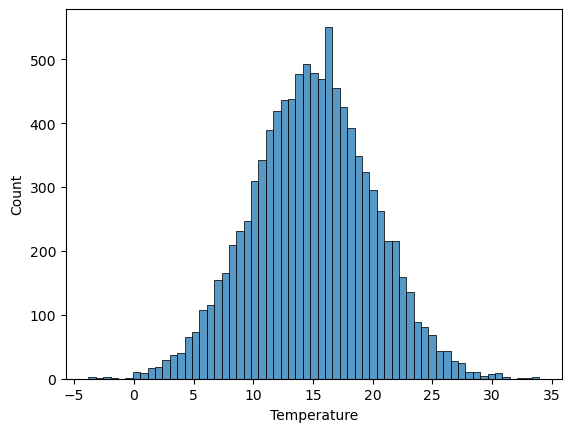

In [28]:
sns.histplot(data=data, x="Temperature")
plt.show()

In [29]:
india_details=data.query("Country=='India'")
india_details

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
44,Stewartbury,India,13.863784,408.121863,-0.078811,77.498661,31.356005,26.264121,2000,2,6,23:07:43.366336
153,Port Jesus,India,14.563792,441.458510,0.012392,72.783893,64.897858,44.925654,2000,5,8,12:47:18.523852
420,Lake Heather,India,8.050407,352.500027,-1.081892,85.429837,90.573097,33.954562,2000,12,18,20:02:48.496849
604,Port Haydentown,India,12.435437,380.040060,-0.376124,92.218718,7.455810,41.320736,2001,5,22,09:51:28.028802
626,Marisafort,India,19.580143,412.246774,1.490122,55.683053,63.584592,44.651892,2001,6,9,21:25:19.711971
754,Jacobland,India,18.290347,312.602899,-0.556386,29.791763,29.240185,47.933234,2001,9,25,10:09:36.777677
764,South Kimberlyshire,India,12.013457,334.323596,-0.046268,55.820262,98.889572,32.544557,2001,10,3,19:46:49.360936
1437,New David,India,8.794670,352.886364,-0.773098,98.618001,99.591771,49.080657,2003,4,22,04:49:02.214221
2589,South Robertstad,India,18.649079,417.644878,-0.488305,74.032718,20.658963,43.859921,2005,12,14,23:27:35.805580
2805,Bowersfurt,India,15.702748,462.738893,-1.027062,67.324433,39.692066,27.317580,2006,6,14,10:27:19.603960


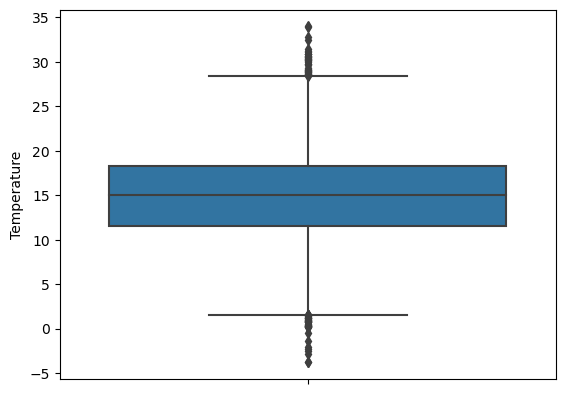

In [30]:
sns.boxplot(data=data, y='Temperature')
plt.show()

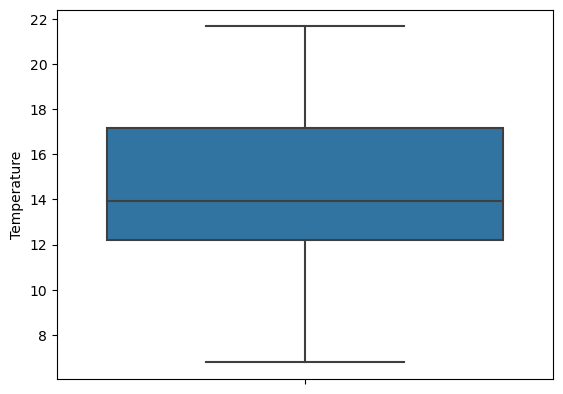

In [31]:
sns.boxplot(data=india_details, y='Temperature')
plt.show()

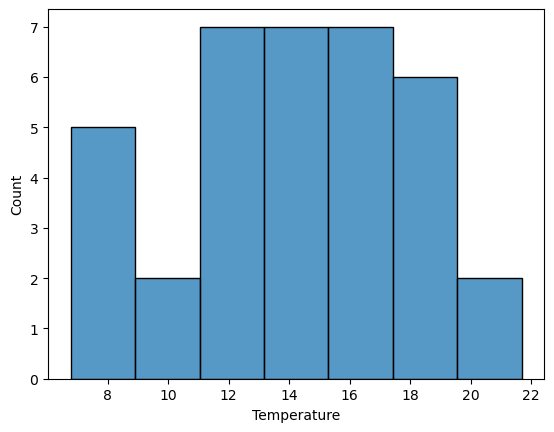

In [32]:
sns.histplot(data=india_details, x='Temperature')
plt.show()

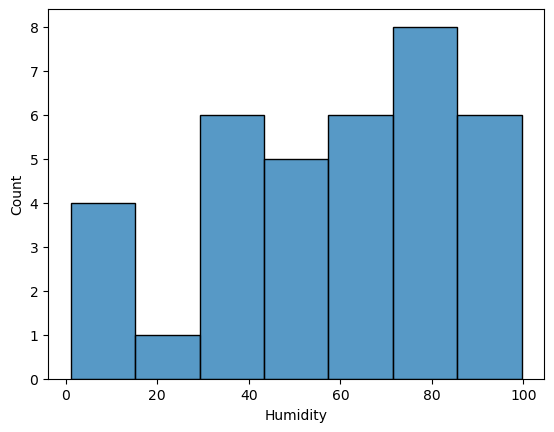

In [33]:
sns.histplot(data=india_details, x='Humidity')
plt.show()

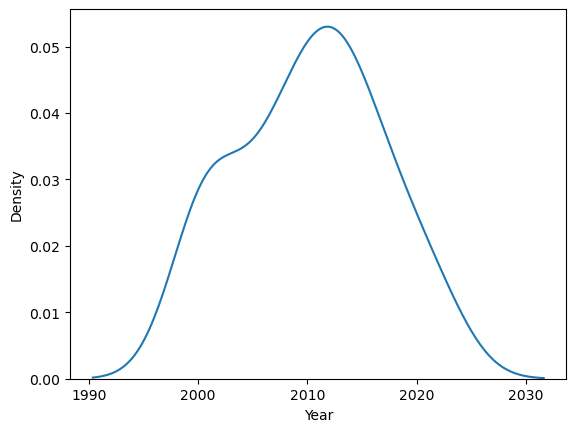

In [34]:
sns.kdeplot(data=india_details, x='Year')
plt.show()

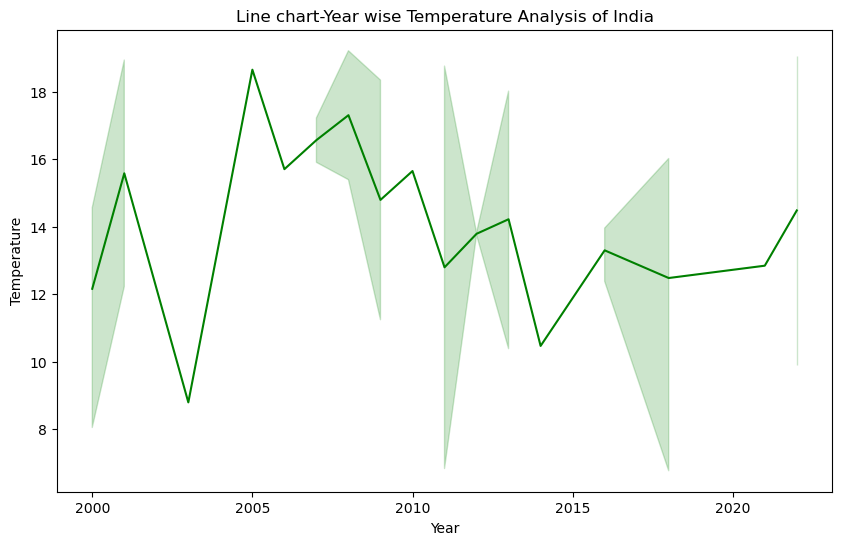

In [35]:
plt.figure(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Line chart-Year wise Temperature Analysis of India')
sns.lineplot(data=india_details, x='Year',y='Temperature', color='green')
plt.show()

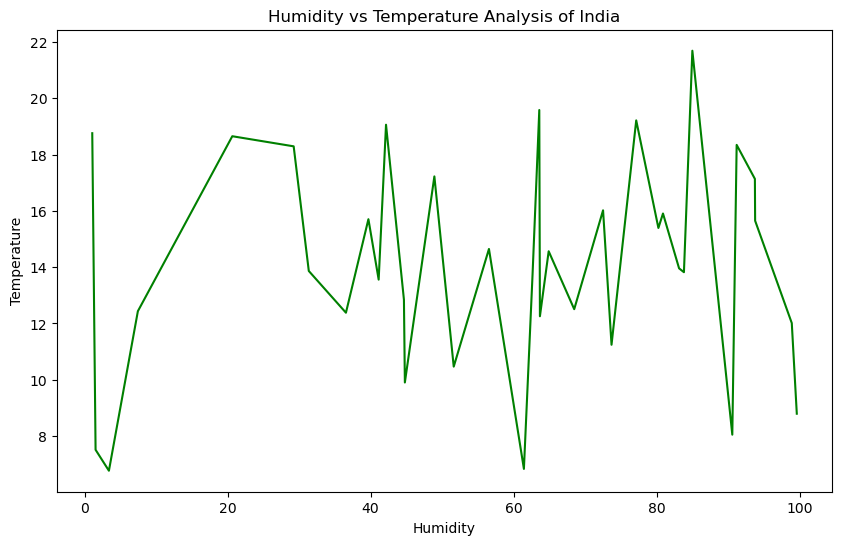

In [36]:
plt.figure(figsize=(10,6))
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Humidity vs Temperature Analysis of India')
sns.lineplot(data=india_details, x='Humidity',y='Temperature', color='green')
plt.show()

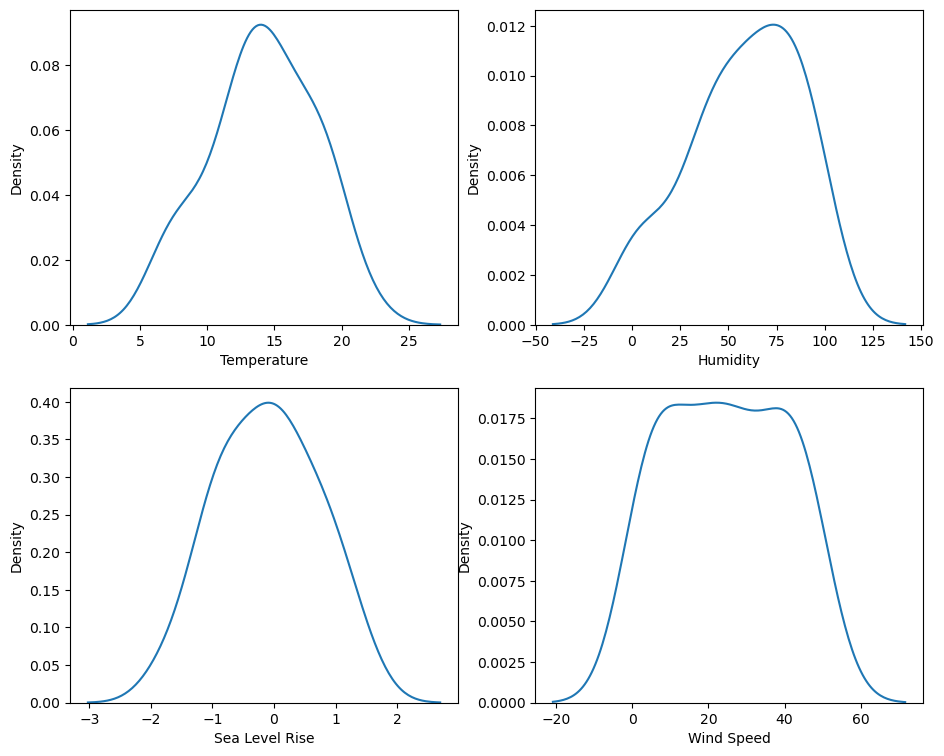

In [37]:
plt.figure(figsize=(11,9))

plt.subplot(2,2,1)
sns.kdeplot(data=india_details, x='Temperature')

plt.subplot(2,2,2)
sns.kdeplot(data=india_details, x='Humidity')

plt.subplot(2,2,3)
sns.kdeplot(data=india_details, x='Sea Level Rise')

plt.subplot(2,2,4)
sns.kdeplot(data=india_details, x='Wind Speed')

plt.show()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Temperature     10000 non-null  float64
 3   CO2 Emissions   10000 non-null  float64
 4   Sea Level Rise  10000 non-null  float64
 5   Precipitation   10000 non-null  float64
 6   Humidity        10000 non-null  float64
 7   Wind Speed      10000 non-null  float64
 8   Year            10000 non-null  int64  
 9   Month           10000 non-null  int64  
 10  Day             10000 non-null  int64  
 11  Time            10000 non-null  object 
dtypes: float64(6), int64(3), object(3)
memory usage: 937.6+ KB


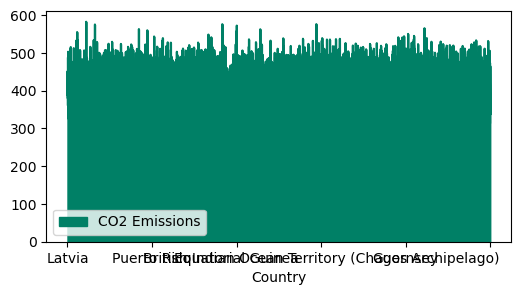

In [39]:
data.plot.area('Country','CO2 Emissions',figsize=(6,3), cmap="summer");

In [40]:
india_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 44 to 9713
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        36 non-null     object 
 1   Country         36 non-null     object 
 2   Temperature     36 non-null     float64
 3   CO2 Emissions   36 non-null     float64
 4   Sea Level Rise  36 non-null     float64
 5   Precipitation   36 non-null     float64
 6   Humidity        36 non-null     float64
 7   Wind Speed      36 non-null     float64
 8   Year            36 non-null     int64  
 9   Month           36 non-null     int64  
 10  Day             36 non-null     int64  
 11  Time            36 non-null     object 
dtypes: float64(6), int64(3), object(3)
memory usage: 4.7+ KB


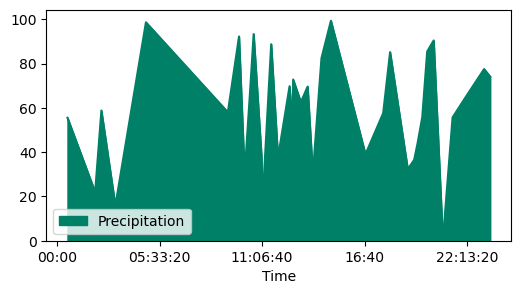

In [41]:
india_details.plot.area('Time','Precipitation',figsize=(6,3), cmap="summer");

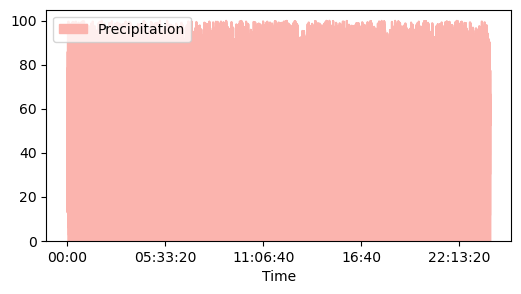

In [42]:
data.plot.area('Time','Precipitation',figsize=(6,3), cmap="Pastel1");

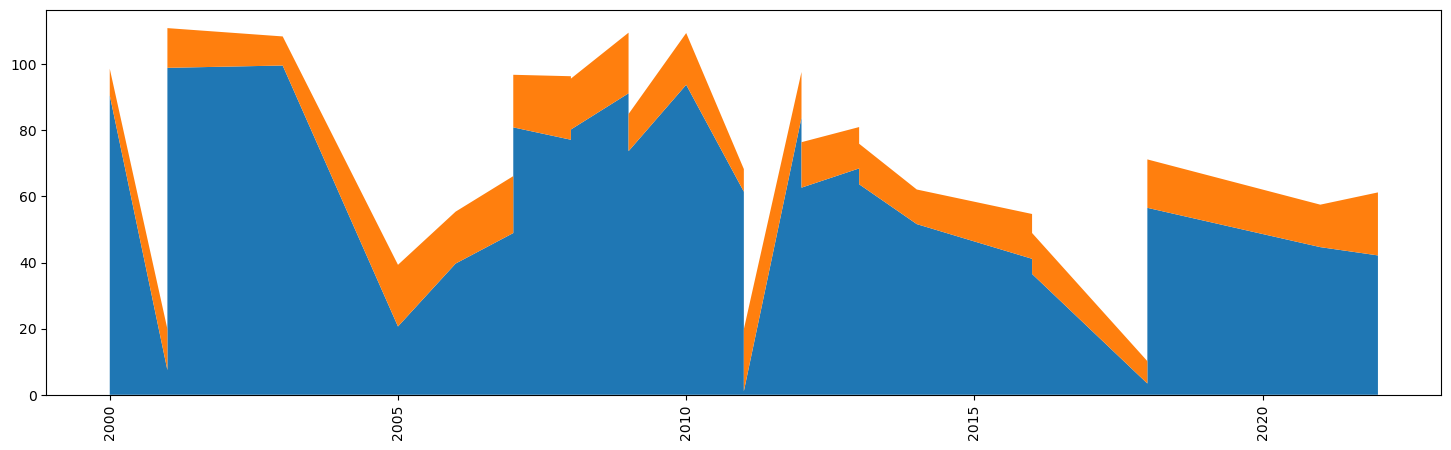

In [43]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
plt.stackplot(india_details.Year,india_details.Humidity,india_details.Temperature)
plt.show()

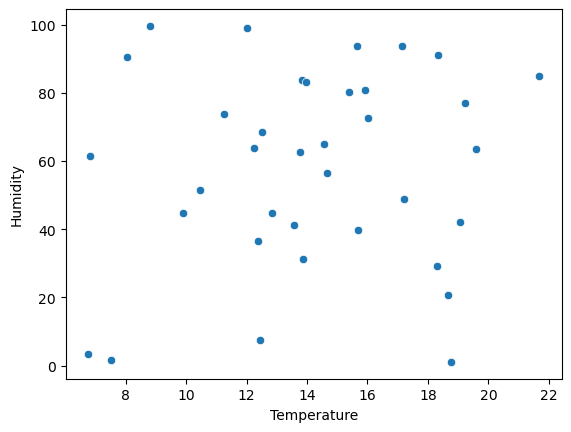

In [44]:
sns.scatterplot(data=india_details, x='Temperature', y='Humidity')
plt.show()

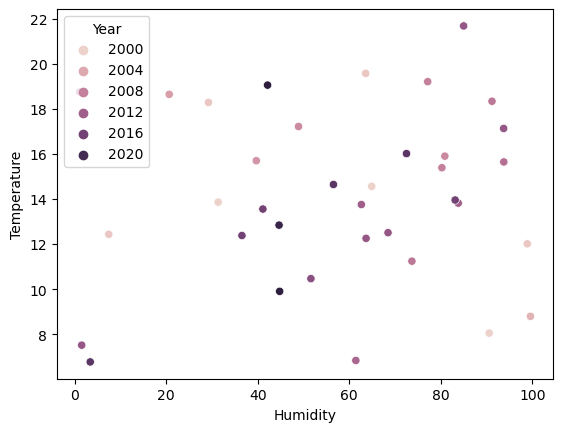

In [45]:
sns.scatterplot(data=india_details, x='Humidity', y='Temperature', hue='Year')
plt.show()

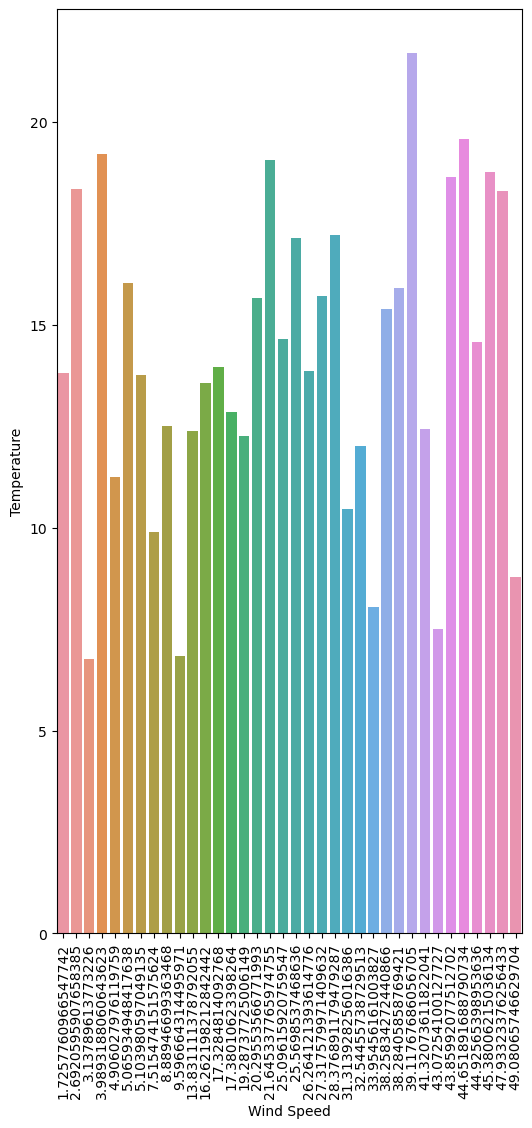

In [46]:
plt.figure(figsize=(6,12))
plt.xticks(rotation = 90)
sns.barplot(data=india_details, x='Wind Speed', y='Temperature')
plt.show()

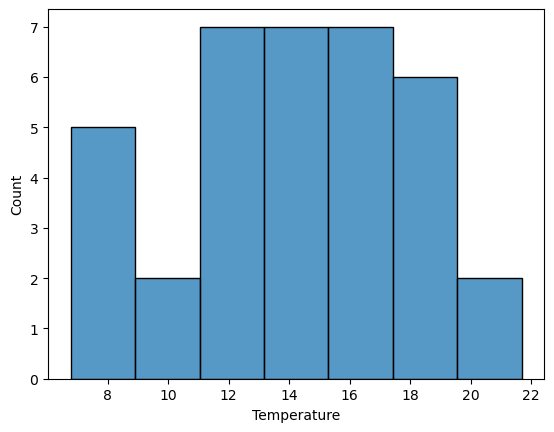

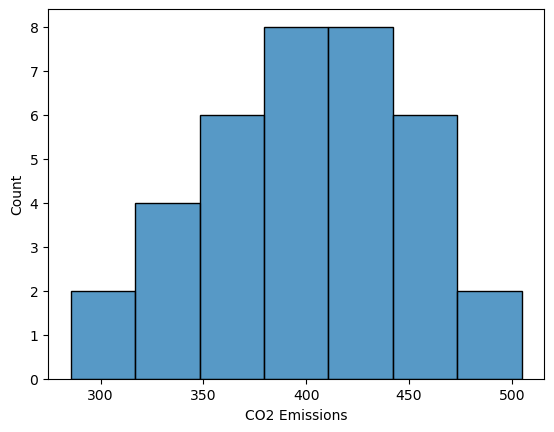

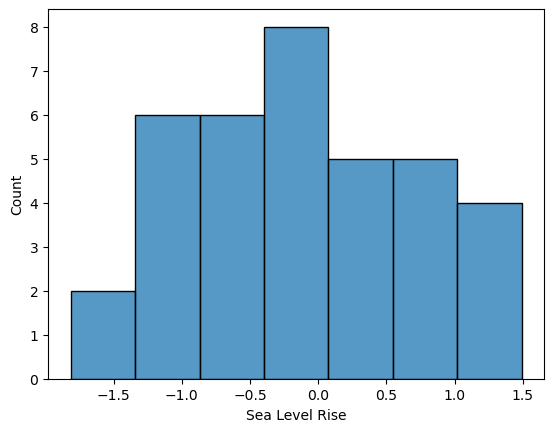

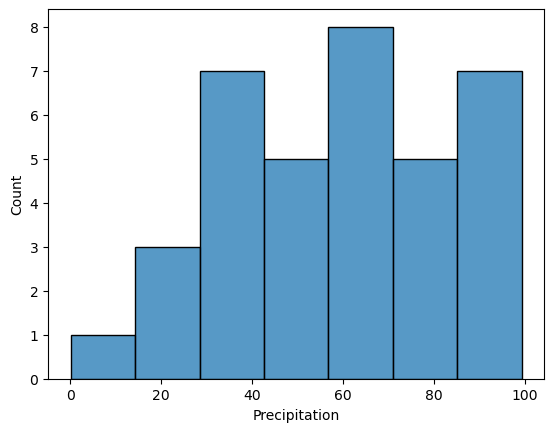

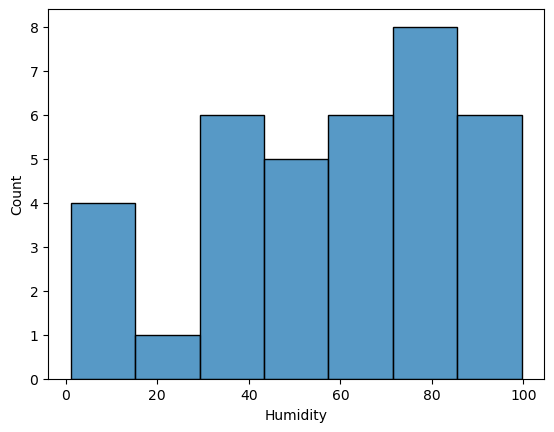

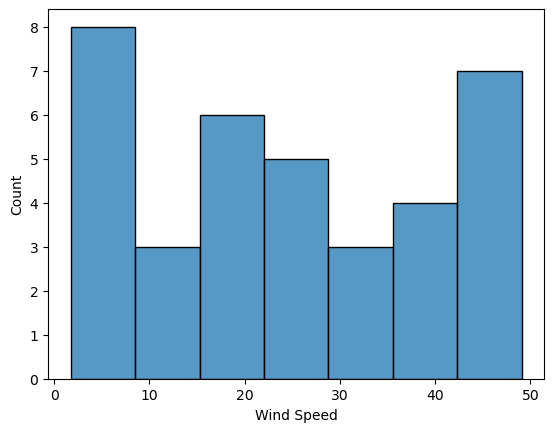

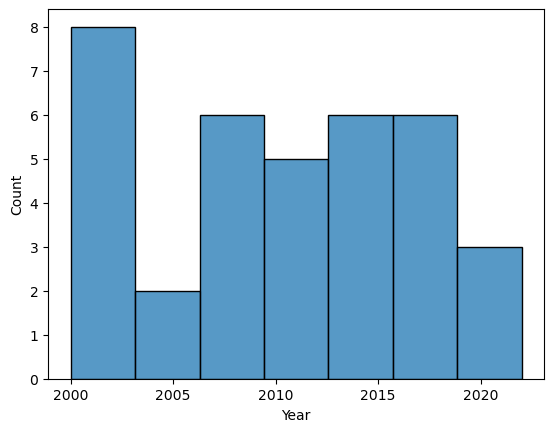

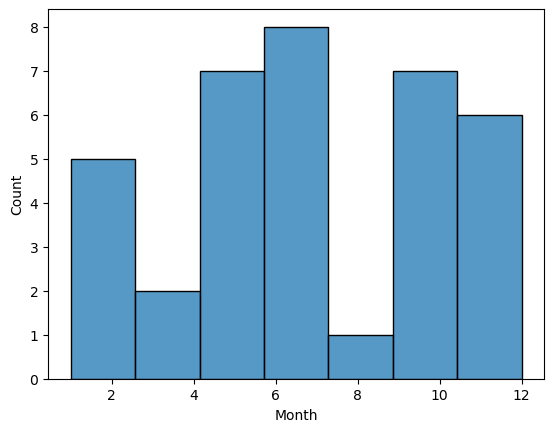

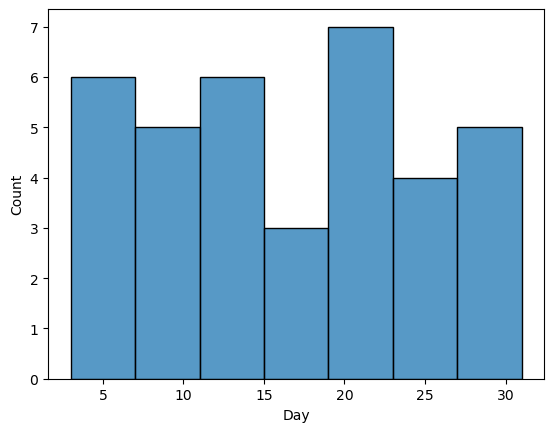

In [47]:
for i in india_details.columns:
    if india_details[i].dtypes != 'object':
        sns.histplot(x=india_details[i])
        plt.show()

In [48]:
features=[]

In [49]:
for i in india_details.columns:
    if india_details[i].dtypes !='object':
        features.append(i)

In [50]:
features

['Temperature',
 'CO2 Emissions',
 'Sea Level Rise',
 'Precipitation',
 'Humidity',
 'Wind Speed',
 'Year',
 'Month',
 'Day']

In [51]:
list(enumerate(features))

[(0, 'Temperature'),
 (1, 'CO2 Emissions'),
 (2, 'Sea Level Rise'),
 (3, 'Precipitation'),
 (4, 'Humidity'),
 (5, 'Wind Speed'),
 (6, 'Year'),
 (7, 'Month'),
 (8, 'Day')]

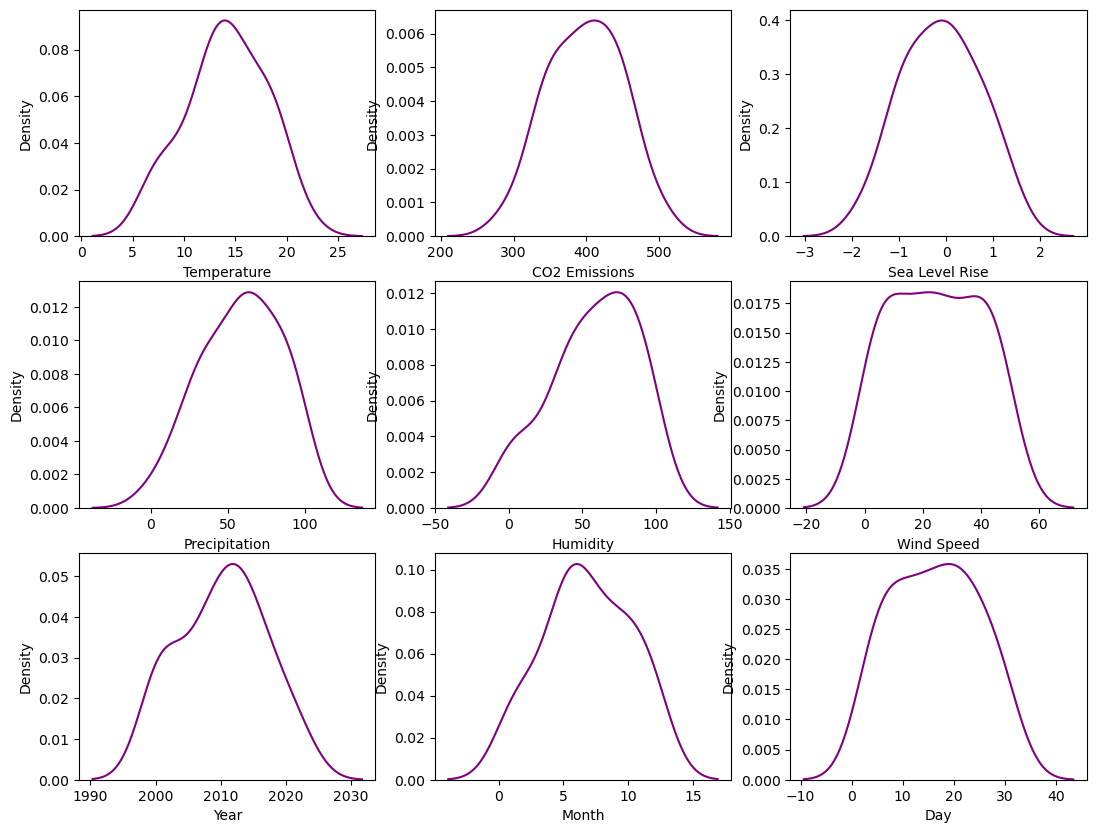

In [52]:
plt.figure(figsize=(13,10))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.kdeplot(data=india_details, x=i[1], color='purple')

In [53]:
country_temp_greater_30=data.query("Temperature>=30.0")
country_temp_greater_30

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
480,Lake Leahburgh,Congo,30.554231,338.373171,-0.464692,66.163779,5.846293,46.685396,2001,2,7,05:46:03.996399
544,Moraborough,Liechtenstein,30.609992,420.796144,-0.257760,67.978381,58.082146,14.480108,2001,4,2,00:08:12.529252
877,East Meganshire,Bahrain,30.556774,283.716379,2.404841,76.699991,80.005142,25.268714,2002,1,6,18:05:17.551755
1195,Malonefort,China,30.249102,420.932290,0.943104,45.733431,87.003256,5.736739,2002,9,30,21:36:33.699369
1654,Lake Michelleview,Brunei Darussalam,30.816299,374.079413,0.496650,59.449509,15.047412,46.130424,2003,10,21,11:58:29.270927
1995,Campbellshire,Georgia,30.270203,363.336189,-0.224672,22.005700,83.192014,27.302722,2004,8,2,23:13:20.360036
2224,Perezborough,Uruguay,31.455420,469.597143,0.815082,66.393905,15.000543,45.734782,2005,2,11,08:19:26.516651
2839,Lake Johnbury,Malawi,32.403159,352.800570,0.836593,90.012918,37.163428,40.449947,2006,7,12,23:57:50.387038
3047,North Caitlinbury,Somalia,30.440684,390.717803,-0.827628,73.397842,5.125633,12.443671,2007,1,3,17:39:48.118811
3098,Flemingburgh,Tajikistan,30.661077,362.253882,-1.010229,63.409681,24.427014,27.243317,2007,2,15,13:55:34.293429


In [54]:
country_temp_greater_30.Country.value_counts().index

Index(['Congo', 'Liechtenstein', 'Bolivia', 'San Marino', 'Rwanda', 'Nigeria',
       'Thailand', 'Niger', 'Italy', 'Libyan Arab Jamahiriya', 'Kiribati',
       'Tajikistan', 'Somalia', 'Malawi', 'Uruguay', 'Georgia',
       'Brunei Darussalam', 'China', 'Bahrain', 'Reunion'],
      dtype='object')

#### Countries with temperature greater than 30

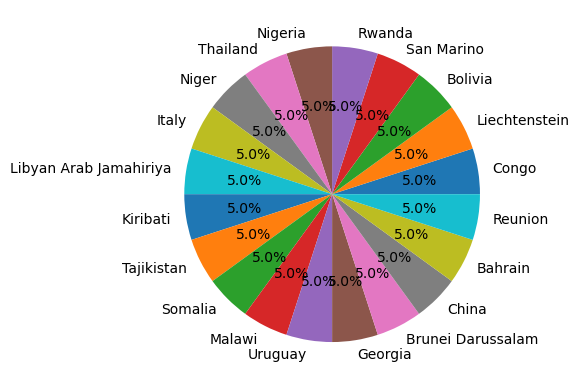

In [55]:
plt.pie(data=country_temp_greater_30, x=country_temp_greater_30.Country.value_counts(),\
       labels=['Congo', 'Liechtenstein', 'Bolivia', 'San Marino', 'Rwanda', 'Nigeria',
       'Thailand', 'Niger', 'Italy', 'Libyan Arab Jamahiriya', 'Kiribati',
       'Tajikistan', 'Somalia', 'Malawi', 'Uruguay', 'Georgia',
       'Brunei Darussalam', 'China', 'Bahrain', 'Reunion'],\
       autopct='%0.1f%%');


In [56]:
india_details

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Day,Time
44,Stewartbury,India,13.863784,408.121863,-0.078811,77.498661,31.356005,26.264121,2000,2,6,23:07:43.366336
153,Port Jesus,India,14.563792,441.458510,0.012392,72.783893,64.897858,44.925654,2000,5,8,12:47:18.523852
420,Lake Heather,India,8.050407,352.500027,-1.081892,85.429837,90.573097,33.954562,2000,12,18,20:02:48.496849
604,Port Haydentown,India,12.435437,380.040060,-0.376124,92.218718,7.455810,41.320736,2001,5,22,09:51:28.028802
626,Marisafort,India,19.580143,412.246774,1.490122,55.683053,63.584592,44.651892,2001,6,9,21:25:19.711971
754,Jacobland,India,18.290347,312.602899,-0.556386,29.791763,29.240185,47.933234,2001,9,25,10:09:36.777677
764,South Kimberlyshire,India,12.013457,334.323596,-0.046268,55.820262,98.889572,32.544557,2001,10,3,19:46:49.360936
1437,New David,India,8.794670,352.886364,-0.773098,98.618001,99.591771,49.080657,2003,4,22,04:49:02.214221
2589,South Robertstad,India,18.649079,417.644878,-0.488305,74.032718,20.658963,43.859921,2005,12,14,23:27:35.805580
2805,Bowersfurt,India,15.702748,462.738893,-1.027062,67.324433,39.692066,27.317580,2006,6,14,10:27:19.603960


In [57]:
c=india_details.Temperature.max()
c

21.68562884818236